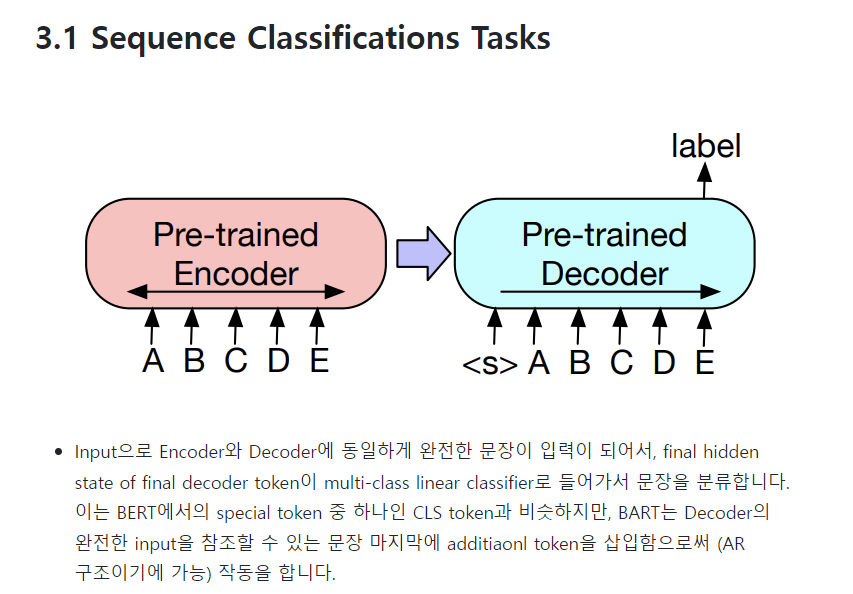

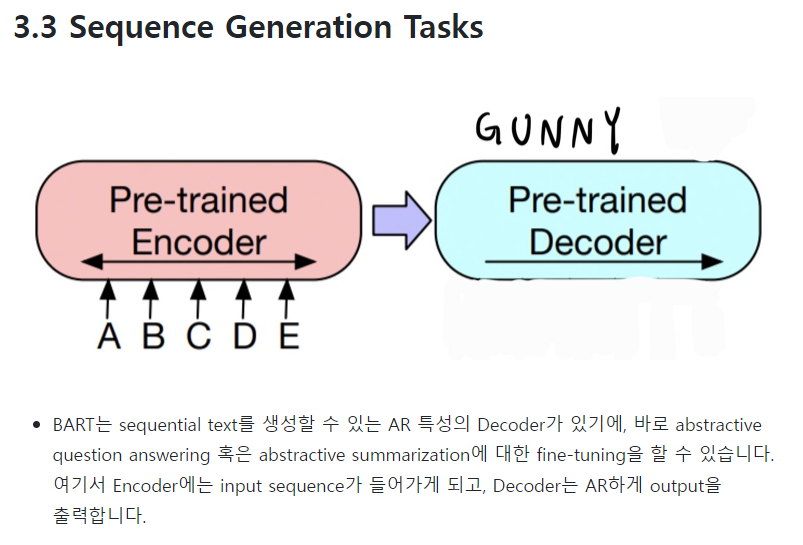

In [6]:
from transformers import BartModel
from kobart import get_pytorch_kobart_model, get_kobart_tokenizer
import torch
from transformers import DataCollatorWithPadding


In [5]:
kobart_tokenizer = get_kobart_tokenizer()
model = BartModel.from_pretrained(get_pytorch_kobart_model())
inputs = kobart_tokenizer(['안녕하세요. 뉴스 시작하겠습니다. 오늘은 참 날이 춥습니다.'], return_tensors='pt')
outputs = model(inputs['input_ids'])

using cached model. c:\Users\minki\Desktop\Bigkinds_news_competition\.cache\kobart_base_tokenizer_cased_cf74400bce.zip


You passed along `num_labels=3` with an incompatible id to label map: {'0': 'NEGATIVE', '1': 'POSITIVE'}. The number of labels wil be overwritten to 2.


using cached model. c:\Users\minki\Desktop\Bigkinds_news_competition\.cache\kobart_base_cased_ff4bda5738.zip


In [29]:
["안녕하세요. 뉴스 시작하겠습니다. 오늘은 참 날이 춥습니다."]+["다이나믹 배치 테스트 중"]

['안녕하세요. 뉴스 시작하겠습니다. 오늘은 참 날이 춥습니다.', '다이나믹 배치 테스트 중']

In [34]:
tokenizer = get_kobart_tokenizer()
text = ["안녕하세요. 뉴스 시작하겠습니다. 오늘은 참 날이 춥습니다.",
        "다이나믹 배치 테스트 중"]
inputs = tokenizer.batch_encode_plus(text)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)
inputs =  data_collator(inputs)
for input in inputs.input_ids:
    print(len(input))
    print(input)

You're using a PreTrainedTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


using cached model. c:\Users\minki\Desktop\Bigkinds_news_competition\.cache\kobart_base_tokenizer_cased_cf74400bce.zip
12
tensor([27616, 25161, 15126, 14351, 14642, 15170, 22619, 14214, 21371,  1700,
        12796, 15170])
12
tensor([14056, 14303, 10747, 17217, 21611, 14059,     3,     3,     3,     3,
            3,     3])


In [25]:
tokenizer = get_kobart_tokenizer()
text = "<s>안녕하세요. 뉴스 시작하겠습니다.<<unused0>오늘은 참 날이 춥습니다.</s>"
inputs = tokenizer.encode(text)
print(inputs)

using cached model. c:\Users\minki\Desktop\Bigkinds_news_competition\.cache\kobart_base_tokenizer_cased_cf74400bce.zip
[0, 27616, 25161, 15126, 14351, 14642, 15170, 259, 7, 22619, 14214, 21371, 1700, 12796, 15170, 1]


In [23]:
tokenizer.bos_token

'<s>'

In [6]:
print(inputs['input_ids'])
print(outputs.last_hidden_state.shape , outputs.encoder_last_hidden_state.shape)
print(len(outputs.past_key_values) , outputs.past_key_values[0][0].shape)

tensor([[27616, 25161, 15126, 14351, 14642, 15170, 22619, 14214, 21371,  1700,
         12796, 15170]])
torch.Size([1, 12, 768]) torch.Size([1, 12, 768])
6 torch.Size([1, 16, 12, 48])


In [7]:
for i in range(10):
    print(kobart_tokenizer.decode(i))

<s>
</s>
<usr>
<pad>
<sys>
<unk>
<mask>
<unused0>
<unused1>
<unused2>


In [8]:
kobart_tokenizer.decode(inputs['input_ids'][0].tolist())

'안녕하세요. 뉴스 시작하겠습니다. 오늘은 참 날이 춥습니다.'

In [9]:
outputs.keys()

odict_keys(['last_hidden_state', 'past_key_values', 'encoder_last_hidden_state'])

In [16]:
inputs = {'input_ids': torch.tensor([[i for i in range(1026)]]), 
          'token_type_ids': torch.tensor([[0 for i in range(1026)]]), 
          'attention_mask': torch.tensor([[1 for i in range(1026)]])}

In [17]:
outputs = model(inputs['input_ids'])

In [18]:
outputs[0].shape

torch.Size([1, 1026, 768])